## 0.1 library setting

In [1]:
import sys
import cntk as C
from cntk.ops import *
from cntk.layers import default_options, Dense    
from cntk import input
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import *
import random

## 1.0 data generation
We use `linear regression` model for understanding basic CNTK features.

|variables|description|range|
|:--|--:|:--:|
|`x`|explanatory variable|`0` $\mapsto$ `10000`|
|`y`|target variable|`0` $\mapsto$ `20001`|

Relation between `x` and `y`: `y=2x+1`


In [2]:
# Create the feature and the label data. For our toy example the features/labels represent a simple line passing through the origin
total_sample_size = 10000

## reshapeしないと、training時にうまく行かない
features = np.array([i + rand() for i in range(total_sample_size)]).reshape(total_sample_size, 1)
labels = np.array([2*i + 1 + rand() for i in range(total_sample_size)]).reshape(total_sample_size, 1)

In [3]:
## 毎回同じ結果を得るため
np.random.seed(0)

def generate_random_data_sample(total_sample_size, sample_size, features, labels):
    ## 選択する要素番号を取得
    index = randint(0, total_sample_size, sample_size)
    ## 要素選択
    return features[index, :], labels[index, :]

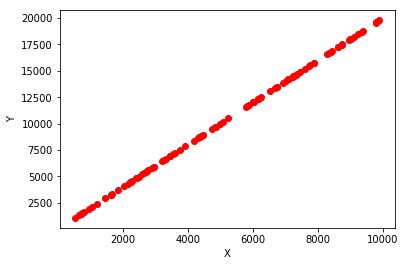

In [4]:
features_sample, labels_sample = generate_random_data_sample( 
    total_sample_size=total_sample_size, 
    sample_size=100, 
    features=features, 
    labels=labels)
plt.scatter(features_sample, labels_sample, c='r')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

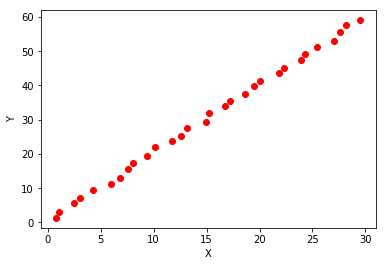

In [5]:
plt.scatter(features[0:30], labels[0:30], c='r')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [6]:
# Define the network as a single node with no activation function
input_dim = 1
num_outputs = 1
input = C.input_variable(input_dim, np.float32)
label = C.input_variable(num_outputs, np.float32)

In [7]:
# Define a dictionary to store the model parameters
mydict = {}
def linear_layer(input_var, output_dim):
    input_dim = input_var.shape[0]
    weight_param = C.parameter(shape=(input_dim, output_dim))
    bias_param = C.parameter(shape=(output_dim))
    
    mydict['w'], mydict['b'] = weight_param, bias_param

    return bias_param + C.times(input_var, weight_param)

In [8]:
z = linear_layer(input, num_outputs)

In [9]:
# Setup loss and evaluation functions
loss = C.squared_error(z, label)
eval_error = C.squared_error(z, label)

In [10]:
# Instantiate the trainer object to drive the model training
learning_rate = 0.0000000001
lr_schedule = C.learning_rate_schedule(learning_rate, C.UnitType.sample) 

In [11]:
learner = C.sgd(z.parameters, lr_schedule)

In [12]:
trainer = C.Trainer(z, (loss, eval_error), [learner])

In [13]:
# Define a utility that prints the training progress
def print_training_progress(trainer, mb, frequency, verbose=1):
    training_loss, eval_error = "NA", "NA"

    if mb % frequency == 0:
        training_loss = trainer.previous_minibatch_loss_average
        eval_error = trainer.previous_minibatch_evaluation_average
        if verbose: 
            print ("Minibatch: {0}, Loss: {1:.4f}, Error: {2:.2f}".format(mb, training_loss, eval_error))
        
    return mb, training_loss, eval_error

In [14]:
# Initialize the parameters for the trainer
minibatch_size = 50
num_samples_to_train = 500000
num_minibatches_to_train = int(num_samples_to_train  / minibatch_size)
print(num_minibatches_to_train)

10000


In [15]:
from collections import defaultdict

# Run the trainer and perform model training
training_progress_output_freq = 1000
plotdata = defaultdict(list)

In [16]:
gradient = []
interception = []
for i in range(0, num_minibatches_to_train):   
    feature_samples, label_samples = generate_random_data_sample(
        total_sample_size=total_sample_size, 
        sample_size=minibatch_size, 
        features=features, 
        labels=labels)
    gradient.append(mydict['w'].value)
    interception.append(mydict['b'].value)
    trainer.train_minibatch({input : feature_samples, label : label_samples})
    batchsize, loss, error = print_training_progress(trainer, i, 
                                                     training_progress_output_freq, verbose=1)

/anaconda/envs/py35/lib/python3.5/site-packages/cntk/core.py:361: UserWarning: your data is of type "float64", but your input variable (uid "Input3") expects "<class 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))
/anaconda/envs/py35/lib/python3.5/site-packages/cntk/core.py:361: UserWarning: your data is of type "float64", but your input variable (uid "Input4") expects "<class 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))


Minibatch: 0, Loss: 128788172.8000, Error: 128788172.80
Minibatch: 1000, Loss: 0.6421, Error: 0.64
Minibatch: 2000, Loss: 0.4236, Error: 0.42
Minibatch: 3000, Loss: 0.5345, Error: 0.53
Minibatch: 4000, Loss: 0.4461, Error: 0.45
Minibatch: 5000, Loss: 0.3759, Error: 0.38
Minibatch: 6000, Loss: 0.4269, Error: 0.43
Minibatch: 7000, Loss: 0.4928, Error: 0.49
Minibatch: 8000, Loss: 0.4759, Error: 0.48
Minibatch: 9000, Loss: 0.5485, Error: 0.55


In [17]:
print(mydict['w'].value, mydict['b'].value)

[[2.000072]] [0.00031887]


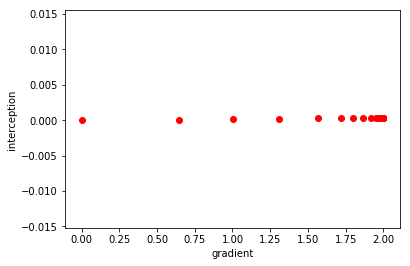

In [18]:
plt.scatter(gradient, interception, c='r')
plt.xlabel('gradient')
plt.ylabel('interception')
plt.show()